In [1]:
# récupération des données
import pandas as pd

lien = 'https://en.wikipedia.org/wiki/CAC_40'
tickers = pd.read_html(lien)[3]['Ticker']
source = 'yahoo'

In [48]:
import pandas_datareader.data as web
import datetime

debut = datetime.datetime(2017, 1, 1)
fin = datetime.datetime(2022, 1, 1)

prixJourCloture = web.DataReader(tickers, source, debut, fin)['Adj Close']

In [87]:
# analyse de la distribution de l'indice
rendements = prixJourCloture.pct_change()
rend_moy_daily =rendements.mean()
rendSample = rend_moy_daily.sample()

# analyse de corrélation entre les différents titres
matCorr = rendements.corr()
print(matCorr)

matCov = rendements.cov()
print(rendements.head())

Symbols     AI.PA    AIR.PA    ALO.PA     MT.AS     CS.PA    BNP.PA     EN.PA  \
Symbols                                                                         
AI.PA    1.000000  0.453077  0.384888  0.476176  0.518250  0.476731  0.543741   
AIR.PA   0.453077  1.000000  0.427501  0.542123  0.567569  0.629097  0.635405   
ALO.PA   0.384888  0.427501  1.000000  0.365953  0.420792  0.427096  0.401106   
MT.AS    0.476176  0.542123  0.365953  1.000000  0.618331  0.655523  0.601609   
CS.PA    0.518250  0.567569  0.420792  0.618331  1.000000  0.737588  0.642896   
BNP.PA   0.476731  0.629097  0.427096  0.655523  0.737588  1.000000  0.675835   
EN.PA    0.543741  0.635405  0.401106  0.601609  0.642896  0.675835  1.000000   
CAP.PA   0.485270  0.523470  0.343542  0.487682  0.518376  0.464089  0.491867   
CA.PA    0.366575  0.213430  0.166801  0.299745  0.345102  0.355235  0.341369   
ACA.PA   0.487861  0.599384  0.402163  0.701538  0.760824  0.887754  0.698475   
BN.PA    0.485678  0.305315 

In [79]:
# création des portefeuilles

import numpy as np

nbrePtf = 15000
résultat = np.zeros((3+len(tickers), nbrePtf))

for u in range(nbrePtf):
    
    poids = np.array(np.random.random(40))
    poids /= np.sum(poids)
    
    rendementPtf = np.dot(poids, rendements.mean()) * 252
    volatPtf = np.sqrt(np.dot(poids.T, np.dot(matCov, poids)))*np.sqrt(252)
    
    résultat[0,u] = rendementPtf
    résultat[1,u] = volatPtf
    résultat[2,u] = rendementPtf / volatPtf
    
    for p in range(len(poids)):
        résultat[p+3,u] = poids[p]

résultatDf = pd.DataFrame(résultat.T,columns=['rend', 'volat', 'sharpe'] + tickers.tolist())

#exportation du fichier sous format Excel
#résultatDf.to_excel (r'C:\Users\Sara\Desktop\Examen_Python_L3.xlsx', index = False, header=True)

print(résultatDf.head())

       rend     volat    sharpe     AI.PA    AIR.PA    ALO.PA     MT.AS  \
0  0.159540  0.211963  0.752680  0.036707  0.023568  0.024194  0.025655   
1  0.152850  0.216975  0.704457  0.024293  0.043129  0.016606  0.033154   
2  0.166249  0.211521  0.785967  0.000005  0.047600  0.037492  0.003144   
3  0.151452  0.208195  0.727451  0.048082  0.047695  0.011746  0.044050   
4  0.152904  0.196769  0.777077  0.029427  0.005456  0.038384  0.019228   

      CS.PA    BNP.PA     EN.PA  ...   STLA.PA    STM.PA    TEP.PA     HO.PA  \
0  0.023078  0.018295  0.004539  ...  0.038817  0.037122  0.023768  0.040511   
1  0.039470  0.035263  0.007766  ...  0.012848  0.019048  0.015866  0.029020   
2  0.010689  0.029485  0.040310  ...  0.049341  0.002984  0.038705  0.035112   
3  0.043363  0.029589  0.014736  ...  0.006845  0.039957  0.027907  0.037534   
4  0.041846  0.001779  0.018469  ...  0.006698  0.037270  0.034003  0.014431   

     TTE.PA    URW.AS    VIE.PA     DG.PA    VIV.PA    WLN.PA  
0  0

In [80]:
# isolation de quatre portefeuilles aux propriétés particulières
volatMin = résultatDf.iloc[résultatDf['volat'].idxmin()]

In [81]:
volatMax = résultatDf.iloc[résultatDf['volat'].idxmax()]

In [82]:
sharpeMin = résultatDf.iloc[résultatDf['sharpe'].idxmin()]

In [83]:
sharpeMax = résultatDf.iloc[résultatDf['sharpe'].idxmax()]

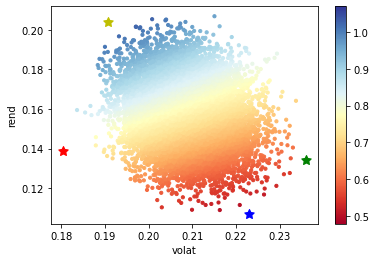

In [86]:
# tracé de la frontière efficiente et de nos quatres portefeuilles particuliers
import matplotlib.pyplot as plt

plt.scatter(résultatDf['volat'], résultatDf['rend'], c = résultatDf['sharpe'], cmap='RdYlBu', s = 10)
plt.xlabel('volat')
plt.ylabel('rend')
plt.colorbar()

plt.scatter(volatMin[1],volatMin[0],marker=(5,1),color='r',s=100)
plt.scatter(volatMax[1],volatMax[0],marker=(5,1),color='g',s=100)
plt.scatter(sharpeMin[1],sharpeMin[0],marker=(5,1),color='b',s=100)
plt.scatter(sharpeMax[1],sharpeMax[0],marker=(5,1),color='y',s=100)